In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
import os
import gdown

# Check ว่ามี directory อยู่หรือไม่ ถ้าไม่มีก็สร้างใหม่
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download the original data
url = 'https://drive.google.com/uc?id=1JcRZ_pST8FrISK2V9t31K4ISEmPTkE06'
output = os.path.join(output_dir, 'df_restaurants_explode.csv')
gdown.download(url, output, quiet=False)

# Data Preprocessing

In [ ]:
df_restaurants = pd.read_json('/content/dataset_crawler-google-places_2024-07-14_09-11-05-929.json')
df_restaurants.head()

,searchString,rank,searchPageUrl,searchPageLoadedUrl,isAdvertisement,title,subTitle,description,price,categoryName,...,url,webResults,parentPlaceUrl,orderBy,images,imageUrls,reviews,popularTimesLiveText,popularTimesLivePercent,popularTimesHistogram
0,restaurant,19,https://www.google.com/maps/search/restaurant/...,https://www.google.com/maps/search/restaurant/...,False,ระเบียงไร่ ปลายนา,NaN,None,None,ภัตตาคารอาหารไทย,...,https://www.google.com/maps/search/?api=1&quer...,[],NaN,[],NaN,[https://streetviewpixels-pa.googleapis.com/v1...,[],NaN,NaN,NaN
1,restaurant,20,https://www.google.com/maps/search/restaurant/...,https://www.google.com/maps/search/restaurant/...,False,ออนซอนพิซซ่า,NaN,None,None,ร้านพิซซ่า,...,https://www.google.com/maps/search/?api=1&quer...,[],NaN,[],NaN,[https://lh5.googleusercontent.com/p/AF1QipOqb...,"[{'name': 'SN nuch23', 'text': None, 'textTran...",NaN,NaN,NaN
2,restaurant,18,https://www.google.com/maps/search/restaurant/...,https://www.google.com/maps/search/restaurant/...,False,ร้านลาบแม่แก้ว,NaN,None,None,ร้านอาหาร,...,https://www.google.com/maps/search/?api=1&quer...,[],NaN,[],NaN,[https://streetviewpixels-pa.googleapis.com/v1...,"[{'name': 'Sukanlaya Dongpo', 'text': None, 't...",NaN,NaN,NaN
3,restaurant,17,https://www.google.com/maps/search/restaurant/...,https://www.google.com/maps/search/restaurant/...,False,มิวสิคหมูกระทะชั่งกิโล,NaN,None,None,ปิ้งย่าง,...,https://www.google.com/maps/search/?api=1&quer...,[],NaN,[],NaN,[https://lh5.googleusercontent.com/p/AF1QipNGp...,[],NaN,NaN,NaN
4,restaurant,16,https://www.google.com/maps/search/restaurant/...,https://www.google.com/maps/search/restaurant/...,False,ครัวบ้านนอก ครัวบ้านเฮา,NaN,None,None,ร้านอาหาร,...,https://www.google.com/maps/search/?api=1&quer...,[],NaN,[],NaN,[https://lh5.googleusercontent.com/p/AF1QipOlx...,[],None,NaN,"{'Su': [{'hour': 6, 'occupancyPercent': 0}, {'..."


In [ ]:
# check row และ column ของข้อมูล จำนวนผู้ใช้จำนวนครั้งการให้คะแนนรีวิว และจำนวนร้านอาหาร
total_num_reviews_unique = df_restaurants['reviews'].apply(lambda x: len(x)).sum()
total_num_reviews_rating = df_restaurants['reviews'].apply(lambda x: len(x)).count()
total_num_restaurants_unique = df_restaurants['title'].unique().size
print("จำนวนผู้ใช้: ",total_num_reviews_unique)
print("จำนวนครั้งการให้คะแนนรีวิว: ",total_num_reviews_rating)
print("จำนวนร้านอาหาร: ",total_num_restaurants_unique)

# จำนวนคอลัมภ์
print("จำนวนคอลัมภ์: ",df_restaurants.shape[1])

จำนวนผู้ใช้:  35207
จำนวนครั้งการให้คะแนนรีวิว:  1496
จำนวนร้านอาหาร:  1489
จำนวนคอลัมภ์:  64


In [ ]:
df_restaurants.shape

(1496, 64)

In [ ]:
df_restaurants.columns

Index(['searchString', 'rank', 'searchPageUrl', 'searchPageLoadedUrl',
       'isAdvertisement', 'title', 'subTitle', 'description', 'price',
       'categoryName', 'address', 'neighborhood', 'street', 'city',
       'postalCode', 'state', 'countryCode', 'website', 'phone',
       'phoneUnformatted', 'claimThisBusiness', 'location', 'locatedIn',
       'plusCode', 'menu', 'totalScore', 'permanentlyClosed',
       'temporarilyClosed', 'placeId', 'categories', 'fid', 'cid',
       'reviewsCount', 'reviewsDistribution', 'imagesCount', 'imageCategories',
       'scrapedAt', 'reserveTableUrl', 'googleFoodUrl', 'hotelStars',
       'hotelDescription', 'checkInDate', 'checkOutDate',
       'similarHotelsNearby', 'hotelReviewSummary', 'hotelAds', 'openingHours',
       'peopleAlsoSearch', 'placesTags', 'reviewsTags', 'additionalInfo',
       'gasPrices', 'questionsAndAnswers', 'updatesFromCustomers', 'url',
       'webResults', 'parentPlaceUrl', 'orderBy', 'images', 'imageUrls',
       'review

In [ ]:
# เลือกเอา Column ที่ต้องการ
df_restaurants = df_restaurants[['placeId','title','categoryName','address','neighborhood','street','city','postalCode','location','totalScore','openingHours','additionalInfo','url','reviews','reviewsDistribution']]
df_restaurants.head()

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,openingHours,additionalInfo,url,reviews,reviewsDistribution
0,ChIJHezWewDrGDER2boLAinY5qc,ระเบียงไร่ ปลายนา,ภัตตาคารอาหารไทย,PCPR+X6 ตำบล ทางขวาง อำเภอ แวงน้อย ขอนแก่น 402...,ตำบล ทางขวาง,PCPR+X6,อำเภอ แวงน้อย,NaN,"{'lat': 15.737499, 'lng': 102.4405528}",NaN,"[{'day': 'วันอาทิตย์', 'hours': '10:00 to 21:0...",{'ตัวเลือกของบริการ': [{'นั่งรับประทานที่ร้าน'...,https://www.google.com/maps/search/?api=1&quer...,[],"{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '..."
1,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,ตำบล ท่าวัด,198 ม.1 บ.โคกล่าม ต,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7344241, 'lng': 102.3991}",5.0,"[{'day': 'วันอาทิตย์', 'hours': '10:00 to 20:0...","{'ตัวเลือกของบริการ': [{'บริการจัดส่ง': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'SN nuch23', 'text': None, 'textTran...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '..."
2,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,ตำบล แวงน้อย,QFX6+X7R บ้านกุดรู,อำเภอ แวงน้อย,NaN,"{'lat': 15.7999964, 'lng': 102.4606415}",4.0,"[{'day': 'วันอาทิตย์', 'hours': '8:00 to 17:00...","{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'Sukanlaya Dongpo', 'text': None, 't...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '..."
3,ChIJ4dHmFpa_GDEREkhoh4NWZ9s,มิวสิคหมูกระทะชั่งกิโล,ปิ้งย่าง,109 แวงน้อย ตำบล แวงน้อย อำเภอ แวงน้อย ขอนแก่น...,ตำบล แวงน้อย,109 แวงน้อย,อำเภอ แวงน้อย,40230.0,"{'lat': 15.8059579, 'lng': 102.4132367}",NaN,"[{'day': 'วันอาทิตย์', 'hours': '10:00 to 20:0...","{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&quer...,[],"{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '..."
4,ChIJq9Hv6V7BGDERNYmmxPG_q-c,ครัวบ้านนอก ครัวบ้านเฮา,ร้านอาหาร,หน้าวัดเรไร บ้านหนองแวงห้วยทราย 123 หมู่ 13 อำ...,ตำบล ละหานนา,หน้าวัดเรไร บ้านหนองแวงห้วยทราย 123 หมู่ 13,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7817159, 'lng': 102.3949676}",NaN,"[{'day': 'วันอาทิตย์', 'hours': '8:00 to 21:00...",{'ตัวเลือกของบริการ': [{'รับสินค้าโดยไม่ต้องลง...,https://www.google.com/maps/search/?api=1&quer...,[],"{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '..."


In [ ]:
df_restaurants.isnull().sum()

,0
placeId,0
title,0
categoryName,0
address,0
neighborhood,3
street,68
city,0
postalCode,203
location,0
totalScore,431


In [ ]:
df_restaurants[df_restaurants['totalScore'].isnull()][['title','totalScore','reviews']].head(10)

,title,totalScore,reviews
0,ระเบียงไร่ ปลายนา,NaN,[]
3,มิวสิคหมูกระทะชั่งกิโล,NaN,[]
4,ครัวบ้านนอก ครัวบ้านเฮา,NaN,[]
5,คุณนายหมูกระทะ Waeng noi 94,NaN,[]
8,ครัวอิงอุ่น,NaN,[]
9,ร้านก๋วยเตี๋ยวเรือ 15 บาท อำเภอแวงน้อย,NaN,[]
10,กันเองส้มตำ,NaN,[]
11,ร้านพิซซ่ามานาสาขาโลตัสแวงน้อย,NaN,[]
15,ก๋วยเตี๋ยวหมูกรอบByยายพัน,NaN,[]
22,ครัวพริกแกง โพธิ์ตาก,NaN,[]


In [ ]:
# drop คะแนนเฉลี่ยของร้านอาหารที่เป็็น NaN
df_restaurants.dropna(subset=['totalScore'],inplace=True)
print("Shape: ",df_restaurants.shape)

Shape:  (1065, 15)


In [ ]:
# Replace totalScore ที่เป็น Nan value ด้วยค่าเฉลี่ย (Option 2)
df_restaurants['totalScore'] = df_restaurants['totalScore'].fillna(df_restaurants['totalScore'].mean())
print("Shape: ",df_restaurants.shape)

Shape:  (1496, 15)


In [ ]:
# Create review_counts
df_restaurants['review_counts'] = df_restaurants['reviews'].apply(lambda x: len(x))
df_restaurants[['title','review_counts']].sort_values(by='review_counts',ascending=False).head(10)

,title,review_counts
135,โอชิเน ขอนแก่น,897
150,สีนานวล คาเฟ่ กังสดาล,866
86,มิตรภาพลาบก้อย,799
176,แซบนัวครัวอิสาน Zab Nour,741
672,Pizza & Bake,639
960,ฮาลองเบย์ อาหารเวียดนาม ขอนแก่น,636
514,ชาม ( Charm kitchen ),631
1027,Takeshi Gold khon kaen,616
127,Haru Hana Japanese Cafe,610
1098,Sizzler Central Plaza Khonkaen,590


In [ ]:
# Check duplicated ของชื่อร้านอาหาร
df_restaurants[df_restaurants['title'].duplicated()][['placeId','title','url','neighborhood']]

,placeId,title,url,neighborhood
106,ChIJ50PdMzeLIjERqp6G4utl2J4,Noodle Shop,https://www.google.com/maps/search/?api=1&quer...,ตำบลในเมือง
566,ChIJl-PgjecuIjER_5CsNk7LviQ,ร้านก๋วยเตี๋ยว,https://www.google.com/maps/search/?api=1&quer...,ตำบล วังเพิ่ม
633,ChIJf3UcWj6LIjER1vPsLjjXrQ0,Suki Mall (Jomphol Market),https://www.google.com/maps/search/?api=1&quer...,ตำบลในเมือง
841,ChIJNV_wuYQfIjERTOMbmJnaHYs,ครัวข้าวหอม,https://www.google.com/maps/search/?api=1&quer...,ตำบล หนองไผ่


In [ ]:
df_restaurants[df_restaurants['title'] == 'Noodle Shop'][['placeId','title','categoryName','totalScore','reviews']]

,placeId,title,categoryName,totalScore,reviews
93,ChIJm9kG10mLIjER8-x8o2R9CLA,Noodle Shop,ร้านก๋วยเตี๋ยว,4.5,"[{'name': 'Always Happiness', 'text': 'ก๋วยเตี..."
106,ChIJ50PdMzeLIjERqp6G4utl2J4,Noodle Shop,ร้านก๋วยเตี๋ยว,5.0,"[{'name': 'jirapan thailert', 'text': 'ก๋วยเตี..."


In [ ]:
print(df_restaurants[df_restaurants['title'] == 'Noodle Shop'].loc[93]['review_counts'])
print(df_restaurants[df_restaurants['title'] == 'Noodle Shop'].loc[106]['review_counts'])

2
2


In [ ]:
print(df_restaurants[df_restaurants['title'] == 'Noodle Shop'][['url']].index)
print(df_restaurants[df_restaurants['title'] == 'Noodle Shop'][['url']].values)

Index([93, 106], dtype='int64')
[['https://www.google.com/maps/search/?api=1&query=Noodle%20Shop&query_place_id=ChIJm9kG10mLIjER8-x8o2R9CLA']
 ['https://www.google.com/maps/search/?api=1&query=Noodle%20Shop&query_place_id=ChIJ50PdMzeLIjERqp6G4utl2J4']]


In [ ]:
df_restaurants[df_restaurants['title'] == 'ร้านก๋วยเตี๋ยว'][['placeId','title','categoryName','totalScore','reviews']]

,placeId,title,categoryName,totalScore,reviews
340,ChIJVV5LIdKrIzERM4J_0bIsoNQ,ร้านก๋วยเตี๋ยว,ร้านอาหาร,5.0,"[{'name': 'Family 55555', 'text': 'อร่อยสมราคา..."
566,ChIJl-PgjecuIjER_5CsNk7LviQ,ร้านก๋วยเตี๋ยว,ร้านอาหาร,4.0,"[{'name': 'infinity tatto', 'text': 'อาหารอร่อ..."


In [ ]:
print(df_restaurants[df_restaurants['title'] == 'ร้านก๋วยเตี๋ยว'].loc[340]['review_counts'])
print(df_restaurants[df_restaurants['title'] == 'ร้านก๋วยเตี๋ยว'].loc[566]['review_counts'])

1
4


In [ ]:
df_restaurants[df_restaurants['title'] == 'ร้านก๋วยเตี๋ยว'][['url']].values

array([['https://www.google.com/maps/search/?api=1&query=%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%99%E0%B8%81%E0%B9%8B%E0%B8%A7%E0%B8%A2%E0%B9%80%E0%B8%95%E0%B8%B5%E0%B9%8B%E0%B8%A2%E0%B8%A7&query_place_id=ChIJVV5LIdKrIzERM4J_0bIsoNQ'],
       ['https://www.google.com/maps/search/?api=1&query=%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%99%E0%B8%81%E0%B9%8B%E0%B8%A7%E0%B8%A2%E0%B9%80%E0%B8%95%E0%B8%B5%E0%B9%8B%E0%B8%A2%E0%B8%A7&query_place_id=ChIJl-PgjecuIjER_5CsNk7LviQ']],
      dtype=object)

In [ ]:
df_restaurants[df_restaurants['title'] == 'ครัวข้าวหอม'][['placeId','title','categoryName','totalScore','reviews']]

,placeId,title,categoryName,totalScore,reviews
395,ChIJTcOEFdCRGDERV0FPqydNW4w,ครัวข้าวหอม,ร้านอาหาร,3.5,"[{'name': 'อนันต์ จงสถาพรพันธุ์', 'text': 'อาห..."
841,ChIJNV_wuYQfIjERTOMbmJnaHYs,ครัวข้าวหอม,ร้านอาหาร,4.4,"[{'name': 'Chanpim Vuthitanachot', 'text': 'อา..."


In [ ]:
print(df_restaurants[df_restaurants['title'] == 'ครัวข้าวหอม'].loc[395]['review_counts'])
print(df_restaurants[df_restaurants['title'] == 'ครัวข้าวหอม'].loc[841]['review_counts'])

10
99


In [ ]:
df_restaurants[df_restaurants['title'] == 'ครัวข้าวหอม'][['url']].values

array([['https://www.google.com/maps/search/?api=1&query=%E0%B8%84%E0%B8%A3%E0%B8%B1%E0%B8%A7%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%AB%E0%B8%AD%E0%B8%A1&query_place_id=ChIJTcOEFdCRGDERV0FPqydNW4w'],
       ['https://www.google.com/maps/search/?api=1&query=%E0%B8%84%E0%B8%A3%E0%B8%B1%E0%B8%A7%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%AB%E0%B8%AD%E0%B8%A1&query_place_id=ChIJNV_wuYQfIjERTOMbmJnaHYs']],
      dtype=object)

In [ ]:
df_restaurants[df_restaurants['title'] == 'Suki Mall (Jomphol Market)'][['placeId','title','categoryName','totalScore','reviews']]

,placeId,title,categoryName,totalScore,reviews
348,ChIJ_Z6z7UWLIjERZSB3gr5rCwg,Suki Mall (Jomphol Market),ภัตตาคารอาหารบุฟเฟต์,3.0,"[{'name': 'T. Sutthirakpong', 'text': 'ครับ', ..."
633,ChIJf3UcWj6LIjER1vPsLjjXrQ0,Suki Mall (Jomphol Market),ภัตตาคารอาหารบุฟเฟต์,4.3,"[{'name': 'Markim Wu', 'text': '•ร้านสุกี้มอลล..."


In [ ]:
print(df_restaurants[df_restaurants['title'] == 'Suki Mall (Jomphol Market)'].loc[348]['review_counts'])
print(df_restaurants[df_restaurants['title'] == 'Suki Mall (Jomphol Market)'].loc[633]['review_counts'])

1
74


In [ ]:
df_restaurants[df_restaurants['title'] == 'Suki Mall (Jomphol Market)'][['url']].values

array([['https://www.google.com/maps/search/?api=1&query=Suki%20Mall%20(Jomphol%20Market)&query_place_id=ChIJ_Z6z7UWLIjERZSB3gr5rCwg'],
       ['https://www.google.com/maps/search/?api=1&query=Suki%20Mall%20(Jomphol%20Market)&query_place_id=ChIJf3UcWj6LIjER1vPsLjjXrQ0']],
      dtype=object)

In [ ]:
# จากข้างต้นจะเห็นว่าควรเก็บข้อมูลร้านอาหารล่าสุดเอาไว้ (keep = 'last')
print("======================== ก่อน Drop ร้านอาหารที่ซํ้า =========================")
print(df_restaurants[df_restaurants['title'].duplicated()][['placeId','title','url','neighborhood']])
# Drop duplicated เก็บร้านอาหารล่าสุดไว้
df_restaurants.drop_duplicates(subset='title', keep='last', inplace=True)
print("======================== หลัง Drop ร้านอาหารที่ซํ้า =========================")
print("Shape: ",df_restaurants.shape)
# Check duplicated อีกรอบ
print(df_restaurants[df_restaurants['title'].duplicated()][['placeId','title','url','neighborhood']])

======================== ก่อน Drop ร้านอาหารที่ซํ้า =========================
                         placeId                       title  \
106  ChIJ50PdMzeLIjERqp6G4utl2J4                 Noodle Shop   
566  ChIJl-PgjecuIjER_5CsNk7LviQ              ร้านก๋วยเตี๋ยว   
633  ChIJf3UcWj6LIjER1vPsLjjXrQ0  Suki Mall (Jomphol Market)   
841  ChIJNV_wuYQfIjERTOMbmJnaHYs                 ครัวข้าวหอม   

                                                   url   neighborhood  
106  https://www.google.com/maps/search/?api=1&quer...    ตำบลในเมือง  
566  https://www.google.com/maps/search/?api=1&quer...  ตำบล วังเพิ่ม  
633  https://www.google.com/maps/search/?api=1&quer...    ตำบลในเมือง  
841  https://www.google.com/maps/search/?api=1&quer...   ตำบล หนองไผ่  
======================== หลัง Drop ร้านอาหารที่ซํ้า =========================
Shape:  (1061, 16)
Empty DataFrame
Columns: [placeId, title, url, neighborhood]
Index: []


In [ ]:
# Check ว่า placeId unique หรือไม่
print(len(df_restaurants['placeId'].unique()))
print(len(df_restaurants['title'].unique()))

1061
1061


In [ ]:
# Check categoryName
df_restaurants['categoryName'].unique()

array(['ร้านพิซซ่า', 'ร้านอาหาร', 'ร้านอาหารครอบครัว',
       'ร้านอาหาร Raw Food', 'ร้านอาหารฟิวชั่นเอเชีย', 'จุดแวะพัก',
       'ร้านก๋วยเตี๋ยว', 'ร้านขนมญี่ปุ่น', 'ร้านขนมหวาน',
       'ร้านอาหารอิตาเลียน', 'ภัตตาคารอาหารไทย', 'ร้านโยเกิร์ตแช่แข็ง',
       'อาหารฟาสต์ฟูด', 'ร้านอาหารชาบูชาบู', 'ร้านข้าวแกงญี่ปุ่น',
       'ร้านซูชิ', 'ร้านอาหารราเมน', 'ร้านแฮมเบอร์เกอร์', 'ร้านกาแฟ',
       'ร้านอาหารฮาลาล', 'ร้านเนื้อย่างเกาหลี',
       'ร้านสุกี้ยากี้และชาบูชาบู', 'ร้านบาร์บีคิว', 'ภัตตาคารอาหารตุรกี',
       'ภัตตาคารอาหารเกาหลี', 'ร้านไก่ย่างสไตล์ญี่ปุ่น',
       'ภัตตาคารอาหารญี่ปุ่น', 'ภัตตาคารอาหารเอเชีย',
       'ภัตตาคารอาหารเวียดนาม', 'ภัตตาคารอาหารบุฟเฟต์', 'บาร์',
       'ภัตตาคารอาหารประเภทไก่', 'ภัตตาคารอาหารมังสวิรัติ', 'ร้านสเต็ก',
       'ร้านอาหารอิซาคายะ', 'ภัตตาคารอาหารทะเล', 'ร้านขายไก่',
       'ร้านอาหารจานเล็ก', 'ร้านขายพิซซ่าแบบซื้อกลับบ้าน',
       'บ้านพักตากอากาศ', 'ภัตตาคารอาหารเช้าและกลางวัน',
       'ร้านอาหารฟิวชั่น', 'ภัตตาคารอาหารเช้า', 'รีสอร์ท',
 

In [ ]:
# Clean categoryName
# รายชื่อหมวดหมู่ที่ไม่ต้องการ
unwanted_categories = [
    'จุดแวะพัก', 'บ้านพักตากอากาศ', 'บาร์',
    'รีสอร์ท', 'ร้านเกม', 'โรงแรม', 'ลานเบียร์',
    'คาราโอเกะบาร์', 'โรงคั่วกาแฟ',
    'ผู้จำหน่ายอาหารและเครื่องดื่มสำหรับบริการจัดเลี้ยง',
    'ชาไข่มุก', 'บิสโทร',
]
# กรอง DataFrame โดยใช้ ~ เพื่อเก็บเฉพาะหมวดหมู่ที่ไม่อยู่ใน unwanted_categories
df_restaurants = df_restaurants[~df_restaurants['categoryName'].isin(unwanted_categories)]

# แสดงผล DataFrame ที่กรองแล้ว
df_restaurants.shape

(1049, 16)

In [ ]:
df_restaurants.isnull().sum()

,0
placeId,0
title,0
categoryName,0
address,0
neighborhood,3
street,68
city,0
postalCode,200
location,0
totalScore,0


In [ ]:
#check missing neighborhood
df_restaurants[df_restaurants['neighborhood'].isnull()]

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,openingHours,additionalInfo,url,reviews,reviewsDistribution,restaurant_review_counts
499,ChIJg_FcDgGLIjERP-yllirygJ8,ร้านอาหารรสมือพี่,ภัตตาคารอาหารไทย,"12/37 No.6 Si Chant Rd ในเมือง, ขอนแก่น 40000 ไทย",None,12/37 No.6 Si Chant Rd ในเมือง,อำเภอเมืองขอนแก่น,40000.0,"{'lat': 16.4270796, 'lng': 102.8694016}",5.0,[],"{'ตัวเลือกของบริการ': [{'บริการจัดส่ง': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'Pre63 ปิ่นปินัทธ์', 'text': 'อาหารจ...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",3


In [ ]:
# เติมค่าที่ขาดหายไป ของ neightborhood
#df_restaurants['neighborhood'][256] = 'ตำบลในเมือง'
#df_restaurants['neighborhood'][499] = 'ตำบลในเมือง'
#df_restaurants['neighborhood'][586] = 'ตำบลบ้านฝาง'
df_restaurants.loc[df_restaurants['placeId']=='ChIJg_FcDgGLIjERP-yllirygJ8','neighborhood'] = 'ตำบลในเมือง'
df_restaurants['neighborhood'].isnull().sum()

0

In [ ]:
#check missing neighborhood (Option 2)
print(df_restaurants[df_restaurants['neighborhood'].isnull()])
df_restaurants['neighborhood'][256] = 'ตำบลในเมือง'
df_restaurants['neighborhood'][499] = 'ตำบลในเมือง'
df_restaurants['neighborhood'][586] = 'ตำบลบ้านฝาง'
print("========================= หลังจาก Clean neightbor ===========================")
print(df_restaurants[df_restaurants['neighborhood'].isnull()])

In [ ]:
df_restaurants['lat'] = df_restaurants['location'].apply(lambda x: x['lat'])
df_restaurants['lng'] = df_restaurants['location'].apply(lambda x: x['lng'])
df_restaurants[['lat','lng']]

,lat,lng
1,15.734424,102.399100
2,15.799996,102.460641
6,15.794880,102.445513
7,15.820084,102.378958
12,15.806404,102.411066
...,...,...
1491,16.528150,102.080819
1492,16.564884,102.017963
1493,16.557359,102.072999
1494,16.568403,102.009005


In [ ]:
data = df_restaurants['additionalInfo'][0]
data

{'ตัวเลือกของบริการ': [{'นั่งรับประทานที่ร้าน': True}],
 'สิ่งอำนวยความสะดวก': [{'ห้องน้ำ': True}],
 'บรรยากาศ': [{'ง่ายๆ สบายๆ': True}, {'อบอุ่น': True}],
 'กลุ่มลูกค้า': [{'มาเป็นกลุ่ม': True}],
 'เด็ก': [{'เหมาะสำหรับเด็ก': True}],
 'ที่จอดรถ': [{'ที่จอดรถแบบไม่เสียค่าใช้จ่าย': True},
  {'ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย': True}]}

In [ ]:
feature = {}
for category, items in data.items():
  #print(items)
  for item in items:
    #print(item)
    for key, value in item.items():
      print(key, value)
      feature[key] = value
feature

นั่งรับประทานที่ร้าน True
ห้องน้ำ True
ง่ายๆ สบายๆ True
อบอุ่น True
มาเป็นกลุ่ม True
เหมาะสำหรับเด็ก True
ที่จอดรถแบบไม่เสียค่าใช้จ่าย True
ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย True


{'นั่งรับประทานที่ร้าน': True,
 'ห้องน้ำ': True,
 'ง่ายๆ สบายๆ': True,
 'อบอุ่น': True,
 'มาเป็นกลุ่ม': True,
 'เหมาะสำหรับเด็ก': True,
 'ที่จอดรถแบบไม่เสียค่าใช้จ่าย': True,
 'ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย': True}

In [ ]:
# ฟังก์ชันในการแยกข้อมูลออกมาเป็นคอลัมน์
def extract_features(data):
    features = {}

    # ตรวจสอบและอัพเดทคุณสมบัติในแต่ละหมวดหมู่
    if data: # Check if data is not None
        for category, items in data.items():
            if items: # Check if items is not None or empty
                for item in items:
                    if item: # Check if item is not None
                        for key, value in item.items():
                            features[key] = value if value else False


    return features

# เรียกใช้งานฟังก์ชัน
features = df_restaurants['additionalInfo'].apply(extract_features)
df_features = pd.DataFrame(features.tolist())
df_features



,บริการจัดส่ง,สั่งกลับบ้าน,นั่งรับประทานที่ร้าน,อาหารมื้อสาย,อาหารกลางวัน,อาหารค่ำ,ห้องน้ำ,ง่ายๆ สบายๆ,มาเป็นกลุ่ม,รับจอง,...,มีเครื่องปรับอากาศ,บริการซักรีด,สัตว์เลี้ยงเข้าพักได้,ร้านอาหาร,รถรับ-ส่งสนามบิน,ศูนย์ฟิตเนส,บริการรับจอดรถ,อาหารที่บาร์,ที่จอดรถแบบเสียค่าใช้จ่าย,มีโต๊ะเปลี่ยนผ้าอ้อม
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,True,True,NaN,True,NaN,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,True,True,True,NaN,NaN,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,NaN,True,True,NaN,NaN,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,NaN,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_features.shape

(1049, 93)

In [ ]:
df_features = df_features.fillna(False)
df_features

<ipython-input-16-826505ca769e>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features = df_features.fillna(False)


,บริการจัดส่ง,สั่งกลับบ้าน,นั่งรับประทานที่ร้าน,อาหารมื้อสาย,อาหารกลางวัน,อาหารค่ำ,ห้องน้ำ,ง่ายๆ สบายๆ,มาเป็นกลุ่ม,รับจอง,...,มีเครื่องปรับอากาศ,บริการซักรีด,สัตว์เลี้ยงเข้าพักได้,ร้านอาหาร,รถรับ-ส่งสนามบิน,ศูนย์ฟิตเนส,บริการรับจอดรถ,อาหารที่บาร์,ที่จอดรถแบบเสียค่าใช้จ่าย,มีโต๊ะเปลี่ยนผ้าอ้อม
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1045,True,True,True,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1046,False,True,True,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1047,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_restaurants.reset_index(drop=True,inplace=True)
df_restaurants

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,openingHours,additionalInfo,url,reviews,reviewsDistribution,review_counts,lat,lng
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,ตำบล ท่าวัด,198 ม.1 บ.โคกล่าม ต,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7344241, 'lng': 102.3991}",5.0,"[{'day': 'วันอาทิตย์', 'hours': '10:00 to 20:0...","{'ตัวเลือกของบริการ': [{'บริการจัดส่ง': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'SN nuch23', 'text': None, 'textTran...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",1,15.734424,102.399100
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,ตำบล แวงน้อย,QFX6+X7R บ้านกุดรู,อำเภอ แวงน้อย,NaN,"{'lat': 15.7999964, 'lng': 102.4606415}",4.0,"[{'day': 'วันอาทิตย์', 'hours': '8:00 to 17:00...","{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'Sukanlaya Dongpo', 'text': None, 't...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",1,15.799996,102.460641
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,"[{'day': 'วันอาทิตย์', 'hours': '7:00 to 20:00...","{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'ธัญศิษฐ์ ธัญทวีภัควงศ์', 'text': 'แ...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",5,15.794880,102.445513
3,ChIJydXkeiu_GDERbHHwr5VsvzA,ครัวน้องอลิน,ร้านอาหารครอบครัว,149 ม.9 ต.ละหานนา อำเภอ แวงน้อย ขอนแก่น 40230 ไทย,ต.ละหานนา,149 ม.9,อำเภอ แวงน้อย,40230.0,"{'lat': 15.8200839, 'lng': 102.3789582}",5.0,"[{'day': 'วันอาทิตย์', 'hours': '10:00 to 15:0...","{'ตัวเลือกของบริการ': [{'บริการจัดส่ง': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'Adam Sơn', 'text': None, 'textTrans...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",1,15.820084,102.378958
4,ChIJddj1a4y_GDERCJC28GNca0w,ร้านหมูกระทะเจ๊จู อ.แวงน้อย,ร้านอาหาร,RC46+HC8 ตำบล แวงน้อย อำเภอ แวงน้อย ขอนแก่น 40...,ตำบล แวงน้อย,RC46+HC8,อำเภอ แวงน้อย,40230.0,"{'lat': 15.8064041, 'lng': 102.4110664}",4.0,"[{'day': 'วันอาทิตย์', 'hours': '11:00 to 22:0...","{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'Phairat Saemaming', 'text': 'ลาว', ...","{'oneStar': 0, 'twoStar': 1, 'threeStar': 3, '...",12,15.806404,102.411066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,ChIJsQKT-ewfIjERAu0KaSIX-WQ,9เฮง น้ำเต้าหู้ @คุณอุ้ม,ร้านอาหาร,G3HJ+788 ชัยทุ่ง ตำบล ชุมแพ อำเภอชุมแพ ขอนแก่น...,ตำบล ชุมแพ,G3HJ+788 ชัยทุ่ง,อำเภอชุมแพ,40130.0,"{'lat': 16.5281501, 'lng': 102.0808188}",5.0,"[{'day': 'วันอาทิตย์', 'hours': '15:00 to 20:0...",{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True}]...,https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'far aum', 'text': 'น้ำเต้าหู้ ขนมปั...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",3,16.528150,102.080819
1045,ChIJ0zN8F6qLITERjQHbQcKIBvY,ก๋วยเตี๋ยวบ้านสวน ยายแอนตาสัก,ร้านอาหาร,313 โนนสะอาด ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น ...,ตำบล โนนสะอาด,313 โนนสะอาด,อำเภอชุมแพ,40290.0,"{'lat': 16.5648842, 'lng': 102.0179631}",5.0,"[{'day': 'วันอาทิตย์', 'hours': '9:00 to 18:00...",{'ตัวเลือกของบริการ': [{'รับสินค้าโดยไม่ต้องลง...,https://www.google.com/maps/search/?api=1&quer...,"[{'name': 'artty VGL', 'text': 'อร่อยมาก ราคาถ...","{'oneStar': 0, 'twoStar': 0, 'threeStar': 0, '...",2,16.564884,102.017963
1046,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,[],"{'ตัวเลือกของบริการ': [{'สั่งกลับบ้าน': True},...",https://www.google.com/maps/search/?api=1&

In [ ]:
# concat with df_features
df_restaurants = pd.concat([df_restaurants, df_features],axis=1)
df_restaurants

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,...,มีเครื่องปรับอากาศ,บริการซักรีด,สัตว์เลี้ยงเข้าพักได้,ร้านอาหาร,รถรับ-ส่งสนามบิน,ศูนย์ฟิตเนส,บริการรับจอดรถ,อาหารที่บาร์,ที่จอดรถแบบเสียค่าใช้จ่าย,มีโต๊ะเปลี่ยนผ้าอ้อม
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,ตำบล ท่าวัด,198 ม.1 บ.โคกล่าม ต,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7344241, 'lng': 102.3991}",5.0,...,False,False,False,False,False,False,False,False,False,False
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,ตำบล แวงน้อย,QFX6+X7R บ้านกุดรู,อำเภอ แวงน้อย,NaN,"{'lat': 15.7999964, 'lng': 102.4606415}",4.0,...,False,False,False,False,False,False,False,False,False,False
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,False,False,False,False,False,False,False
3,ChIJydXkeiu_GDERbHHwr5VsvzA,ครัวน้องอลิน,ร้านอาหารครอบครัว,149 ม.9 ต.ละหานนา อำเภอ แวงน้อย ขอนแก่น 40230 ไทย,ต.ละหานนา,149 ม.9,อำเภอ แวงน้อย,40230.0,"{'lat': 15.8200839, 'lng': 102.3789582}",5.0,...,False,False,False,False,False,False,False,False,False,False
4,ChIJddj1a4y_GDERCJC28GNca0w,ร้านหมูกระทะเจ๊จู อ.แวงน้อย,ร้านอาหาร,RC46+HC8 ตำบล แวงน้อย อำเภอ แวงน้อย ขอนแก่น 40...,ตำบล แวงน้อย,RC46+HC8,อำเภอ แวงน้อย,40230.0,"{'lat': 15.8064041, 'lng': 102.4110664}",4.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,ChIJsQKT-ewfIjERAu0KaSIX-WQ,9เฮง น้ำเต้าหู้ @คุณอุ้ม,ร้านอาหาร,G3HJ+788 ชัยทุ่ง ตำบล ชุมแพ อำเภอชุมแพ ขอนแก่น...,ตำบล ชุมแพ,G3HJ+788 ชัยทุ่ง,อำเภอชุมแพ,40130.0,"{'lat': 16.5281501, 'lng': 102.0808188}",5.0,...,False,False,False,False,False,False,False,False,False,False
1045,ChIJ0zN8F6qLITERjQHbQcKIBvY,ก๋วยเตี๋ยวบ้านสวน ยายแอนตาสัก,ร้านอาหาร,313 โนนสะอาด ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น ...,ตำบล โนนสะอาด,313 โนนสะอาด,อำเภอชุมแพ,40290.0,"{'lat': 16.5648842, 'lng': 102.0179631}",5.0,...,False,False,False,False,False,False,False,False,False,False
1046,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,...,False,False,False,False,False,False,False,False,False,False
1047,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,ตำบล โนนสะอาด,92,อำเภอชุมแพ,40290.0,"{'lat': 16.5684032, 'lng': 102.0090051}",4.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_restaurants.shape

(1049, 111)

In [ ]:
df_restaurants.isnull().sum()

,0
placeId,0
title,0
categoryName,0
address,0
neighborhood,0
...,...
ศูนย์ฟิตเนส,0
บริการรับจอดรถ,0
อาหารที่บาร์,0
ที่จอดรถแบบเสียค่าใช้จ่าย,0


In [ ]:
df_restaurants['reviews'][28]

[{'name': 'จิรโรจน์ สีมาตจันทร์',
  'text': 'สุขใจที่ใดก็อยู่ที่นั่นให้นานนาน',
  'textTranslated': None,
  'publishAt': '5 เดือนที่แล้ว',
  'publishedAtDate': '2024-02-10T00:18:54.327Z',
  'likesCount': 0,
  'reviewId': 'ChdDSUhNMG9nS0VJQ0FnSUNkMElMUHZBRRAB',
  'reviewUrl': 'https://www.google.com/maps/reviews/data=!4m8!14m7!1m6!2m5!1sChdDSUhNMG9nS0VJQ0FnSUNkMElMUHZBRRAB!2m1!1s0x0:0x5315e3f0729a1db8!3m1!1s2@1:CIHM0ogKEICAgICd0ILPvAE%7CCgwI7oGbrgYQ6PujnAE%7C?hl=th',
  'reviewerId': '113622727327384838846',
  'reviewerUrl': 'https://www.google.com/maps/contrib/113622727327384838846?hl=th',
  'reviewerPhotoUrl': 'https://lh3.googleusercontent.com/a-/ALV-UjVHxwm3XBmuFAxmbIZ4FDPQe0wRS9Nbnoyb2MmfOq1W5S1y7wo=s120-c-rp-mo-ba2-br100',
  'reviewerNumberOfReviews': 6,
  'isLocalGuide': True,
  'reviewOrigin': 'Google',
  'stars': 5,
  'rating': None,
  'responseFromOwnerDate': '2024-02-10T01:09:31.000Z',
  'responseFromOwnerText': 'ขอบคุณมากค่ะ เฮงๆรวยๆ ค่ะ',
  'reviewImageUrls': [],
  'reviewCo

In [ ]:
# explode reviews
df_restaurants_explode = df_restaurants.explode('reviews').reset_index(drop=True)
df_restaurants_explode

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,...,มีเครื่องปรับอากาศ,บริการซักรีด,สัตว์เลี้ยงเข้าพักได้,ร้านอาหาร,รถรับ-ส่งสนามบิน,ศูนย์ฟิตเนส,บริการรับจอดรถ,อาหารที่บาร์,ที่จอดรถแบบเสียค่าใช้จ่าย,มีโต๊ะเปลี่ยนผ้าอ้อม
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,ตำบล ท่าวัด,198 ม.1 บ.โคกล่าม ต,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7344241, 'lng': 102.3991}",5.0,...,False,False,False,False,False,False,False,False,False,False
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,ตำบล แวงน้อย,QFX6+X7R บ้านกุดรู,อำเภอ แวงน้อย,NaN,"{'lat': 15.7999964, 'lng': 102.4606415}",4.0,...,False,False,False,False,False,False,False,False,False,False
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,False,False,False,False,False,False,False
3,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,False,False,False,False,False,False,False
4,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34590,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,...,False,False,False,False,False,False,False,False,False,False
34591,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,...,False,False,False,False,False,False,False,False,False,False
34592,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,ตำบล โนนสะอาด,92,อำเภอชุมแพ,40290.0,"{'lat': 16.5684032, 'lng': 102.0090051}",4.5,...,False,False,False,False,False,False,False,False,False,False
34593,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,ตำบล โนนสะอาด,92,อำเภอชุมแพ,40290.0,"{'lat': 16.5684032, 'lng': 102.0090051}",4.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_restaurants_explode.shape

(34595, 111)

In [ ]:
df_restaurants_explode[['placeId','title','categoryName','address','totalScore','reviews']]

,placeId,title,categoryName,address,totalScore,reviews
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,5.0,"{'name': 'SN nuch23', 'text': None, 'textTrans..."
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,4.0,"{'name': 'Sukanlaya Dongpo', 'text': None, 'te..."
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'ธัญศิษฐ์ ธัญทวีภัควงศ์', 'text': 'แว..."
3,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'Ruckchat Thiralertpanitch', 'text': ..."
4,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'Mangkon Khoroo', 'text': 'แม่ค้าน่าร..."
...,...,...,...,...,...,...
35199,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,4.4,"{'name': 'JATUPHOL KULRAT', 'text': None, 'tex..."
35200,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,4.4,"{'name': 'คมกริช วิจิตรปัญญา', 'text': None, '..."
35201,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,4.5,"{'name': 'PONGSATHORN', 'text': 'อาหารอร่อย รา..."
35202,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,4.5,"{'name': 'นิตยา ดวงคํา', 'text': None, 'textTr..."


In [ ]:
df_restaurants_explode['reviews'][1]

{'name': 'Sukanlaya Dongpo',
 'text': None,
 'textTranslated': None,
 'publishAt': '8 เดือนที่แล้ว',
 'publishedAtDate': '2023-11-01T06:33:47.835Z',
 'likesCount': 0,
 'reviewId': 'ChZDSUhNMG9nS0VJQ0FnSUNGZzktMVFBEAE',
 'reviewUrl': 'https://www.google.com/maps/reviews/data=!4m8!14m7!1m6!2m5!1sChZDSUhNMG9nS0VJQ0FnSUNGZzktMVFBEAE!2m1!1s0x0:0xc817aa936474a5c2!3m1!1s2@1:CIHM0ogKEICAgICFg9-1QA%7CCgwIy-KHqgYQyMiYjgM%7C?hl=th',
 'reviewerId': '112360860535224473297',
 'reviewerUrl': 'https://www.google.com/maps/contrib/112360860535224473297?hl=th',
 'reviewerPhotoUrl': 'https://lh3.googleusercontent.com/a-/ALV-UjUhzJncGFJh8F89a-JRudR1aGim902urCHyUGdRXYXfkMRFEpM=s120-c-rp-mo-br100',
 'reviewerNumberOfReviews': None,
 'isLocalGuide': False,
 'reviewOrigin': 'Google',
 'stars': 4,
 'rating': None,
 'responseFromOwnerDate': None,
 'responseFromOwnerText': None,
 'reviewImageUrls': [],
 'reviewContext': {'บริการ': 'รับประทานที่ร้าน',
  'ประเภทอาหาร': 'อาหารกลางวัน',
  'ราคาต่อคน': '฿1-100'},
 're

In [ ]:
df_restaurants_explode.shape

(35616, 115)

In [ ]:
print("Reviews missing: ",df_restaurants_explode['reviews'].isnull().sum())
print("TotalScore missing: ",df_restaurants_explode['totalScore'].isnull().sum())

Reviews missing:  0
TotalScore missing:  0


In [ ]:
df_restaurants_explode[['placeId','title','categoryName','address','totalScore','reviews']].head()

,placeId,title,categoryName,address,totalScore,reviews
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,5.0,"{'name': 'SN nuch23', 'text': None, 'textTrans..."
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,4.0,"{'name': 'Sukanlaya Dongpo', 'text': None, 'te..."
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'ธัญศิษฐ์ ธัญทวีภัควงศ์', 'text': 'แว..."
3,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'Ruckchat Thiralertpanitch', 'text': ..."
4,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,4.8,"{'name': 'Mangkon Khoroo', 'text': 'แม่ค้าน่าร..."


In [ ]:
#extract review informations
df_restaurants_explode['reviewerId'] = df_restaurants_explode['reviews'].apply(lambda x: x['reviewerId'] if 'reviewerId' in x else None)
df_restaurants_explode['reviewerName'] = df_restaurants_explode['reviews'].apply(lambda x: x['name'] if 'name' in x else None)
df_restaurants_explode['reviewerRated'] = df_restaurants_explode['reviews'].apply(lambda x: x['stars'] if 'stars' in x else None)
df_restaurants_explode['reviewerText'] = df_restaurants_explode['reviews'].apply(lambda x: x['text'] if 'text' in x else None)
df_restaurants_explode['likesCount'] = df_restaurants_explode['reviews'].apply(lambda x: x['likesCount'] if 'likesCount' in x else None)
df_restaurants_explode['reviewerUrl'] = df_restaurants_explode['reviews'].apply(lambda x: x['reviewerUrl'] if 'reviewerUrl' in x else None)
df_restaurants_explode['publishedAtDate'] = df_restaurants_explode['reviews'].apply(lambda x: x['publishedAtDate'] if 'publishedAtDate' in x else None)
df_restaurants_explode[['reviewerId','reviewerName','reviewerRated','reviewerText','likesCount','reviewerUrl','publishedAtDate']]

,reviewerId,reviewerName,reviewerRated,reviewerText,likesCount,reviewerUrl,publishedAtDate
0,106760605994525626948,SN nuch23,5.0,None,0,https://www.google.com/maps/contrib/1067606059...,2022-02-27T09:16:38.109Z
1,112360860535224473297,Sukanlaya Dongpo,4.0,None,0,https://www.google.com/maps/contrib/1123608605...,2023-11-01T06:33:47.835Z
2,108879582625151895950,ธัญศิษฐ์ ธัญทวีภัควงศ์,5.0,แวะรับประทานอาหารเที่ยง บรรยากาศดีมาก,1,https://www.google.com/maps/contrib/1088795826...,2023-10-10T04:11:17.486Z
3,109307340694805295261,Ruckchat Thiralertpanitch,5.0,อาหารอร่อยคุ้มราคาครับ,0,https://www.google.com/maps/contrib/1093073406...,2024-02-06T13:04:58.290Z
4,103142764963188088922,Mangkon Khoroo,5.0,แม่ค้าน่ารักใจดีรถผมเสียช่วยเหลือดีมาก,0,https://www.google.com/maps/contrib/1031427649...,2023-01-09T08:51:01.725Z
...,...,...,...,...,...,...,...
34590,113769917556540182499,JATUPHOL KULRAT,5.0,None,0,https://www.google.com/maps/contrib/1137699175...,2023-10-29T17:39:17.975Z
34591,103452261775044884977,คมกริช วิจิตรปัญญา,5.0,None,0,https://www.google.com/maps/contrib/1034522617...,2023-10-04T13:01:26.435Z
34592,108133286919840214423,PONGSATHORN,5.0,อาหารอร่อย ราคาไม่แพง 😋🍲🍛,1,https://www.google.com/maps/contrib/1081332869...,2023-08-11T15:57:12.171Z
34593,104588231828648084426,นิตยา ดวงคํา,4.0,None,0,https://www.google.com/maps/contrib/1045882318...,2023-03-30T05:13:17.792Z


In [ ]:
# แปลง publishedAtDate เป็น datetime และเก็บแค่ ปี-เดือน-วัน
df_restaurants_explode['publishedAtDate'] = pd.to_datetime(df_restaurants_explode['publishedAtDate']).dt.strftime('%Y-%m-%d')
df_restaurants_explode['publishedAtDate']

,publishedAtDate
0,2022-02-27
1,2023-11-01
2,2023-10-10
3,2024-02-06
4,2023-01-09
...,...
34590,2023-10-29
34591,2023-10-04
34592,2023-08-11
34593,2023-03-30


In [ ]:
# หาว่าข้อมูลที่เก็บมา มีรีวิวอยู่ในช่วง ปีอะไร ถึง ปีอะไร

# แปลง publishedAtDate เป็น datetime (ถ้ายังไม่แปลง)
df_restaurants_explode['publishedAtDate'] = pd.to_datetime(df_restaurants_explode['publishedAtDate'])

min_year = df_restaurants_explode['publishedAtDate'].dt.year.min()
max_year = df_restaurants_explode['publishedAtDate'].dt.year.max()

print(f"ข้อมูลมีรีวิวอยู่ในช่วงปี {min_year} ถึง {max_year}")

ข้อมูลมีรีวิวอยู่ในช่วงปี 2010 ถึง 2024


In [ ]:
df_restaurants_explode.shape

(35204, 118)

In [ ]:
df_restaurants_explode['reviewerId'].isnull().sum()

13

In [ ]:
df_restaurants_explode[df_restaurants_explode['reviewerId'].isnull()][['reviewerId','reviewerName','reviewerRated','reviewerUrl']]

,reviewerId,reviewerName,reviewerRated,reviewerUrl
10786,None,Stephane J,NaN,None
10790,None,Kaye C,NaN,None
10793,None,Parl R,NaN,None
10806,None,Elizabeth K,NaN,None
10808,None,nim p,NaN,None
10809,None,Freddy C,NaN,None
10810,None,Alicia H,NaN,None
10812,None,Hoong C,NaN,None
10813,None,Jean-Paul D,NaN,None
10814,None,Mymydo,NaN,None


In [ ]:
# drop reviewerId
df_restaurants_explode.dropna(subset=['reviewerId'],inplace=True)
df_restaurants_explode.reset_index(drop=True,inplace=True)
df_restaurants_explode.shape

(34582, 118)

In [ ]:
df_restaurants_explode.to_csv('df_restaurants_explode.csv',index=False)

In [ ]:
df_restaurants_explode.to_excel('df_restaurants_explode.xlsx',index=False)

# EDA

Feedback ทั้งหมดจากอาจารย์
Feedback 1: สรุปข้อมูลที่เอามาใช้, แบ่งประเภทข้อมูลที่เรียบร้อย, สิ่งที่จะเป็น input หรือ output, similarity base, ให้ user ให้คะแนนร้านที่ sample มา แล้วให้ระบบลองแนะนำออกไป
Feedback 2: เขียน Metadata เพื่อสรุปข้อมูลที่จะใช้
Feedback 3: เช็คว่า user คนไหนไปรีวิวร้านอาหารเดิมมากกว่า 1 ครั้งหรือไม่? + Plot,
Plot histogram ของ user กับ user เพิ่ม, Check Shape ของ Matrix ที่ได้จาก Pearson, Check Sparse,
Plot ดู คสพ. ว่า user 1 คนรีวิวไปกี่ครั้ง กับ user 1 คนมีคะแนนเฉลี่ยเท่าใดจากการรีวิวทั้งหมด

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [15]:
import os
import gdown

# Check ว่ามี directory อยู่หรือไม่ ถ้าไม่มีก็สร้างใหม่
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download the cleaned data
url = 'https://drive.google.com/uc?id=19nsK00g1y9xzjoZpTTAn-5E_gmdEjh8u'
output = os.path.join(output_dir, 'df_restaurants_explode.csv')
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=19nsK00g1y9xzjoZpTTAn-5E_gmdEjh8u
From (redirected): https://drive.google.com/uc?id=19nsK00g1y9xzjoZpTTAn-5E_gmdEjh8u&confirm=t&uuid=23fd1888-0d0b-4f06-bcaf-e555cf0b11c1
To: d:\Restaurant recommendation system\Restaurant_recommendation_system\data\df_restaurants_explode.csv
100%|██████████| 169M/169M [00:04<00:00, 41.9MB/s] 


'../data\\df_restaurants_explode.csv'

In [16]:
# ข้อมูลที่ผ่านการ clean แล้ว
df_restaurants_explode = pd.read_csv('../data/df_restaurants_explode.csv')
df_restaurants_explode

,placeId,title,categoryName,address,neighborhood,street,city,postalCode,location,totalScore,...,อาหารที่บาร์,ที่จอดรถแบบเสียค่าใช้จ่าย,มีโต๊ะเปลี่ยนผ้าอ้อม,reviewerId,reviewerName,reviewerRated,reviewerText,likesCount,reviewerUrl,publishedAtDate
0,ChIJ5UTiapLBGDERju1c1DiRp-0,ออนซอนพิซซ่า,ร้านพิซซ่า,198 ม.1 บ.โคกล่าม ต ตำบล ท่าวัด อำเภอ แวงน้อย ...,ตำบล ท่าวัด,198 ม.1 บ.โคกล่าม ต,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7344241, 'lng': 102.3991}",5.0,...,False,False,False,106760605994525626948,SN nuch23,5.0,NaN,0,https://www.google.com/maps/contrib/1067606059...,2022-02-27
1,ChIJNWXQp-uVGDERwqV0ZJOqF8g,ร้านลาบแม่แก้ว,ร้านอาหาร,QFX6+X7R บ้านกุดรู ตำบล แวงน้อย อำเภอ แวงน้อย ...,ตำบล แวงน้อย,QFX6+X7R บ้านกุดรู,อำเภอ แวงน้อย,NaN,"{'lat': 15.7999964, 'lng': 102.4606415}",4.0,...,False,False,False,112360860535224473297,Sukanlaya Dongpo,4.0,NaN,0,https://www.google.com/maps/contrib/1123608605...,2023-11-01
2,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,108879582625151895950,ธัญศิษฐ์ ธัญทวีภัควงศ์,5.0,แวะรับประทานอาหารเที่ยง บรรยากาศดีมาก,1,https://www.google.com/maps/contrib/1088795826...,2023-10-10
3,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,109307340694805295261,Ruckchat Thiralertpanitch,5.0,อาหารอร่อยคุ้มราคาครับ,0,https://www.google.com/maps/contrib/1093073406...,2024-02-06
4,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,นาตาวาน คาเฟ่,ร้านอาหาร,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ อำเภอ แวงน้อย ขอ...,ตำบล แวงน้อย,226 ม.5 บ้านอีโล ถ.พล-ชัยภูมิ,อำเภอ แวงน้อย,40230.0,"{'lat': 15.7948796, 'lng': 102.4455131}",4.8,...,False,False,False,103142764963188088922,Mangkon Khoroo,5.0,แม่ค้าน่ารักใจดีรถผมเสียช่วยเหลือดีมาก,0,https://www.google.com/maps/contrib/1031427649...,2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34577,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,...,False,False,False,113769917556540182499,JATUPHOL KULRAT,5.0,NaN,0,https://www.google.com/maps/contrib/1137699175...,2023-10-29
34578,ChIJL9M0WhJrIjER202Wcz94J14,หมูกระทะ บัณฑิตโฟล์คซอง,ร้านอาหาร,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์ ...,ตำบล หนองไผ่,เลขที่ 31 หมู่ 1 หมู่บ้าน กุดแข้ ถนนมะลิวัลย์,อำเภอชุมแพ,40130.0,"{'lat': 16.5573588, 'lng': 102.0729993}",4.4,...,False,False,False,103452261775044884977,คมกริช วิจิตรปัญญา,5.0,NaN,0,https://www.google.com/maps/contrib/1034522617...,2023-10-04
34579,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,ตำบล โนนสะอาด,92,อำเภอชุมแพ,40290.0,"{'lat': 16.5684032, 'lng': 102.0090051}",4.5,...,False,False,False,108133286919840214423,PONGSATHORN,5.0,อาหารอร่อย ราคาไม่แพง 😋🍲🍛,1,https://www.google.com/maps/contrib/1081332869...,2023-08-11
34580,ChIJn8QJtM2LITERn9vEF0kkTdM,นัวทางโค้ง ส้มตำ ยำแซ่บ,ร้านอาหาร,92 ตำบล โนนสะอาด อำเภอชุมแพ ขอนแก่น 40290 ไทย,ตำบล โนนสะอาด,92,อำเภอชุมแพ,40290.0,"{'lat': 16.5684032, 'lng': 102.0090051}",4.5,...,False,False,False,104588231828648084426,นิตยา ดวงคํา,4.0,NaN,0,https://www.google.com/maps/contrib/1045882318...,2023-03-30


In [ ]:
df_restaurants_explode[df_restaurants_explode['reviewerId'] == '103850732430031757793']['reviewerRated']

,reviewerRated
4855,5.0


In [ ]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

In [ ]:
# หาจำนวนผู้ใช้, จำนวนการให้คะแนน, จำนวนร้านอาหาร
print("จำนวนผู้ใช้: ",len(df_restaurants_explode['reviewerId']))
print("จำนวนการให้คะแนน: ",df_restaurants_explode['reviewerRated'].count())
print("จำนวนร้านอาหาร: ",len(df_restaurants_explode['title'].unique()))

จำนวนผู้ใช้:  34582
จำนวนการให้คะแนน:  34582
จำนวนร้านอาหาร:  1049


In [ ]:
# ร้านไหนมีจำนวนคนรีวิวให้คะแนนมากที่สุด
df_restaurants_explode.groupby('title')['reviewerId'].count().sort_values(ascending=False).head(10)

,reviewerId
title,
โอชิเน ขอนแก่น,897
สีนานวล คาเฟ่ กังสดาล,866
มิตรภาพลาบก้อย,799
แซบนัวครัวอิสาน Zab Nour,741
Pizza & Bake,639
ฮาลองเบย์ อาหารเวียดนาม ขอนแก่น,636
ชาม ( Charm kitchen ),631
Takeshi Gold khon kaen,616
Haru Hana Japanese Cafe,610


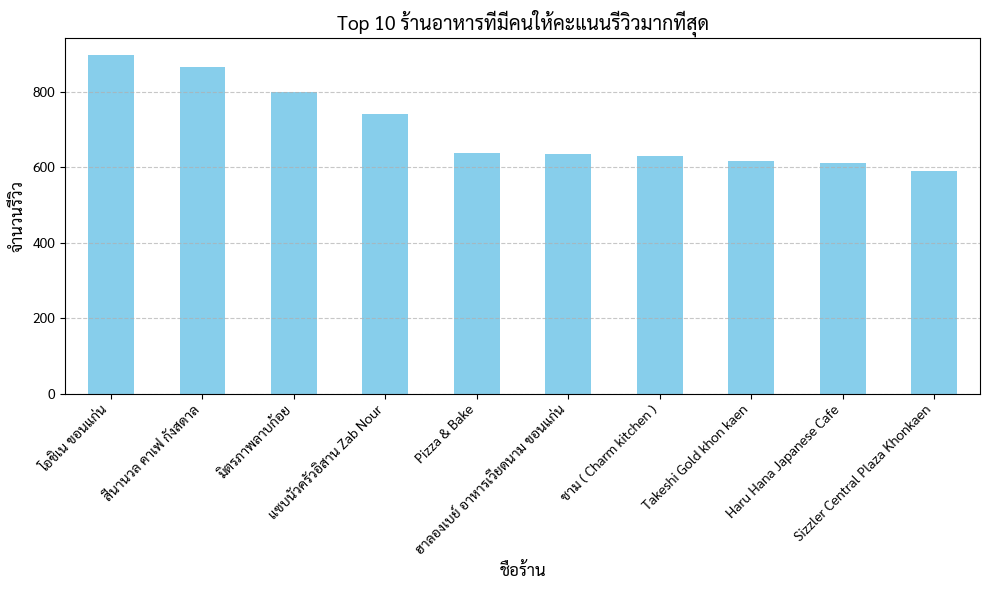

In [ ]:
# Plot graph (ทำ distribution เพิ่ม)
top_reviews = df_restaurants_explode.groupby('title')['reviewerId'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_reviews.plot(kind='bar', color='skyblue')
plt.title('Top 10 ร้านอาหารที่มีคนให้คะแนนรีวิวมากที่สุด', fontsize=14)
plt.xlabel('ชื่อร้าน', fontsize=12)
plt.ylabel('จำนวนรีวิว', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

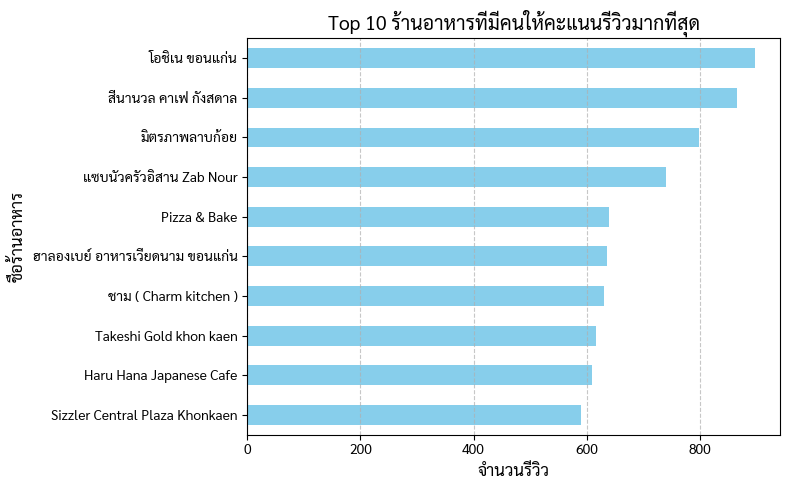

In [ ]:
# Plot graph ร้านอาหารที่มีคนรีวิวมากที่สุด 10 อันดีบแรก โดยใช้ horizon bar เรียงจากมากไปน้อย (จากบนไปล่าง)
top_reviews = df_restaurants_explode.groupby('title')['reviewerId'].count().sort_values(ascending=True).tail(10)
plt.figure(figsize=(8, 5))
top_reviews.plot(kind='barh', color='skyblue')
plt.title('Top 10 ร้านอาหารที่มีคนให้คะแนนรีวิวมากที่สุด', fontsize=14)
plt.xlabel('จำนวนรีวิว', fontsize=12)
plt.ylabel('ชื่อร้านอาหาร', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_restaurants.groupby('categoryName')['title'].count().sort_values(ascending=False).head(10)

categoryName
ร้านอาหาร               673
ภัตตาคารอาหารไทย         56
ร้านอาหารครอบครัว        52
อาหารฟาสต์ฟูด            35
ร้านก๋วยเตี๋ยว           34
ภัตตาคารอาหารญี่ปุ่น     24
ร้านอาหารชาบูชาบู        13
ร้านกาแฟ                 11
ภัตตาคารอาหารบุฟเฟต์     10
ร้านบาร์บีคิว             8
Name: title, dtype: int64

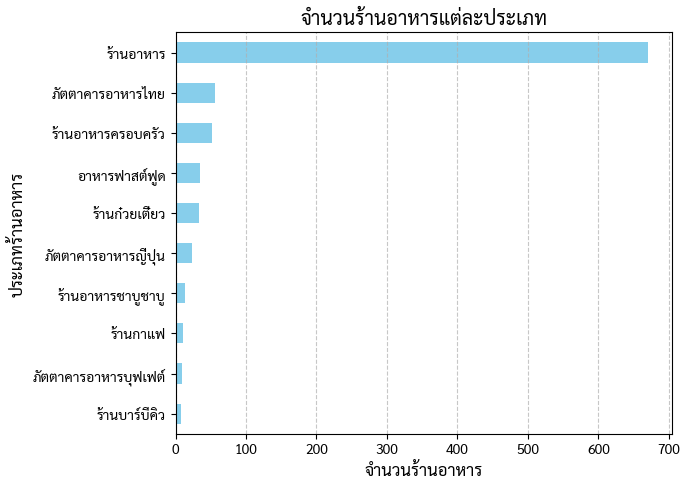

In [ ]:
# Plot graph ประเภทร้านอาหารเรียงจากมากไปน้อย (จากบนไปล่าง)
category_counts = df_restaurants.groupby('categoryName')['title'].count().sort_values(ascending=True).tail(10)
plt.figure(figsize=(7, 5))
category_counts.plot(kind='barh', color='skyblue')
plt.title('จำนวนร้านอาหารแต่ละประเภท', fontsize=14)
plt.xlabel('จำนวนร้านอาหาร', fontsize=12)
plt.ylabel('ประเภทร้านอาหาร', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

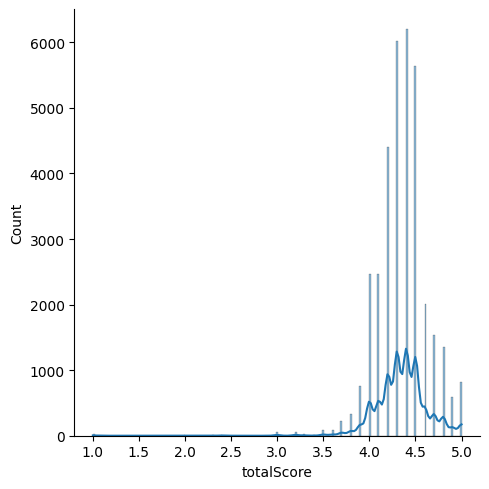

In [ ]:
# distribution ของ totalScore (คะแนนเฉลี่ยของร้านอาหาร)
sns.displot(df_restaurants_explode['totalScore'], kde=True)

In [ ]:
df_restaurants_explode.groupby('reviewerId')['reviewerId'].count().sort_values(ascending=False).head(10)

,reviewerId
reviewerId,
114699830227326564524,39
106685444628465539043,36
101916152201106075880,34
115129893288778670473,34
102504634898175648255,33
116678381544577047680,32
105935150174589487839,32
100281621413160296308,30
118407595285011532505,29


In [ ]:
# เช็คว่า user คนไหนไปรีวิวร้านอาหารเดิมมากกว่า 1 ครั้งหรือไม่?
user_restaurant_counts = df_restaurants_explode.groupby(['reviewerId', 'title'])['reviewerId'].count()
repeated_reviews = user_restaurant_counts[user_restaurant_counts > 1]
repeated_reviews

,,reviewerId
reviewerId,title,


In [ ]:
df_restaurants_explode.groupby('reviewerId')['reviewerId'].count().mean()

1.5710522791196035

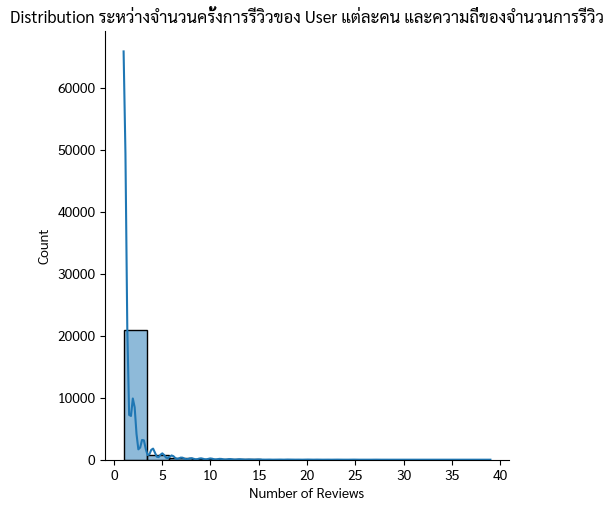

In [ ]:
# Count the number of reviews per reviewerId
reviews_per_user = df_restaurants_explode.groupby('reviewerId')['reviewerId'].count()

# Plot the distribution using Seaborn
sns.displot(reviews_per_user, kde=True)
plt.title('Distribution ระหว่างจำนวนครั้งการรีวิวของ User แต่ละคน และความถี่ของจำนวนการรีวิว')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

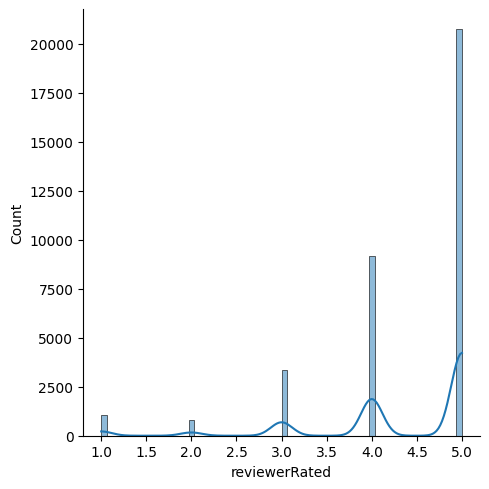

In [ ]:
# distribution ของการให้คะแนนของลูกค้าแต่ละคน
sns.displot(df_restaurants_explode['reviewerRated'], kde=True)

<Axes: xlabel='reviewerRated'>

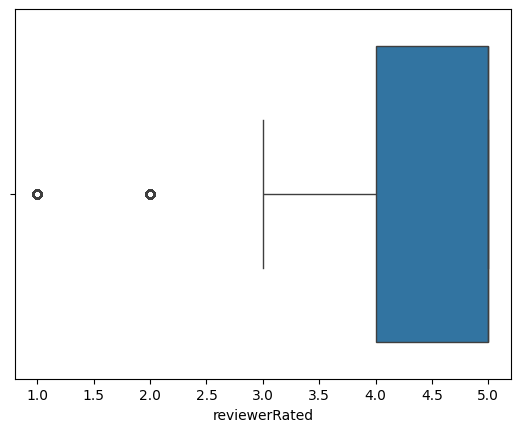

In [ ]:
# boxplot ของการให้คะแนนของลูกค้าแต่ละคน
sns.boxplot(x=df_restaurants_explode['reviewerRated'])

<Axes: xlabel='count'>

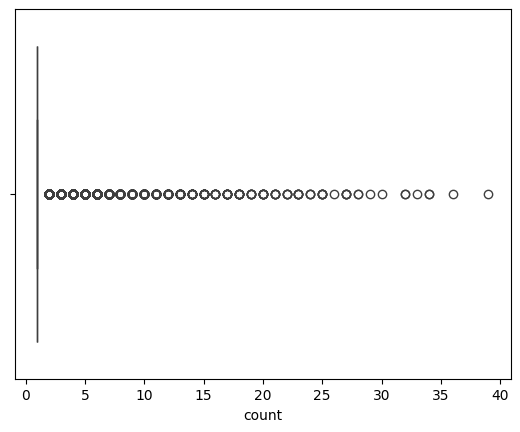

In [ ]:
# Boxplot จำนวนครั้งของ user แต่ละคนในการรีวิว
sns.boxplot(x=df_restaurants_explode['reviewerId'].value_counts())

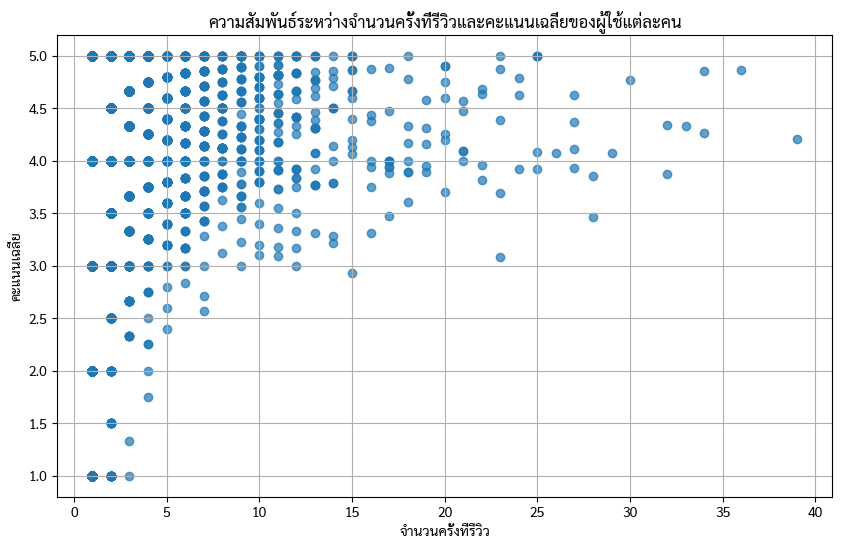

In [ ]:
# Plot ดู คสพ. ว่า user 1 คนรีวิวไปกี่ครั้ง กับ user 1 คนมีคะแนนเฉลี่ยเท่าใดจากการรีวิวทั้งหมด

# Count the number of reviews per reviewerId
reviews_per_user = df_restaurants_explode.groupby('reviewerId')['reviewerId'].count()

# Calculate the average rating per reviewerId
avg_rating_per_user = df_restaurants_explode.groupby('reviewerId')['reviewerRated'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reviews_per_user, avg_rating_per_user, alpha=0.7)
plt.title('ความสัมพันธ์ระหว่างจำนวนครั้งที่รีวิวและคะแนนเฉลี่ยของผู้ใช้แต่ละคน')
plt.xlabel('จำนวนครั้งที่รีวิว')
plt.ylabel('คะแนนเฉลี่ย')
plt.grid(True)
plt.show()

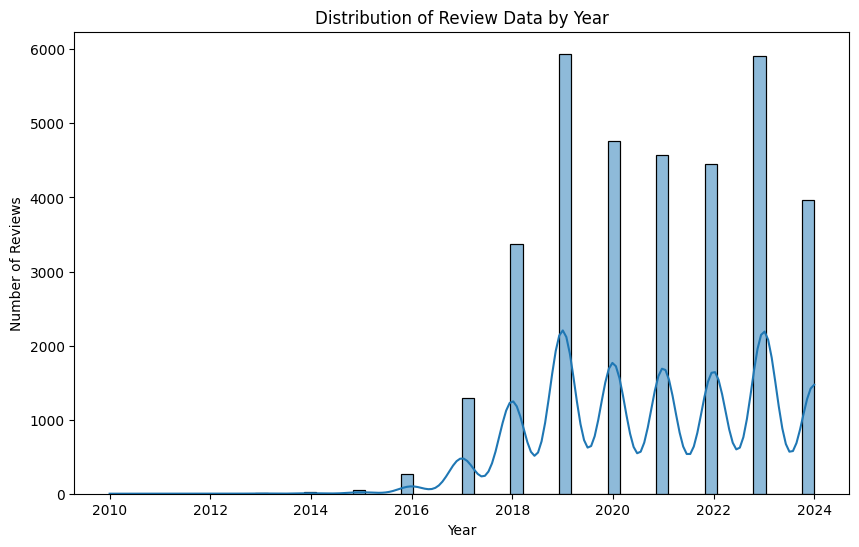

In [ ]:
# Plot distribution ข้อมูลรีวิวส่วนใหญ่ที่เก็บมาอยู่ในช่วงปีไหน

# แปลง publishedAtDate เป็น datetime
df_restaurants_explode['publishedAtDate'] = pd.to_datetime(df_restaurants_explode['publishedAtDate'])

# สร้างกราฟแสดงการกระจายของข้อมูลรีวิวตามปี
plt.figure(figsize=(10, 6))
sns.histplot(df_restaurants_explode['publishedAtDate'].dt.year, kde=True)
plt.title('Distribution of Review Data by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# สร้างแผนที่เริ่มต้นที่จังหวัดขอนแก่น
map_kk = folium.Map(location=[16.4316, 102.8252], zoom_start=12)

# แปลงข้อมูลเป็นลิสต์ของพิกัด
locations = df_restaurants[['lat', 'lng']].values.tolist()

# เพิ่ม HeatMap ลงในแผนที่
HeatMap(locations).add_to(map_kk)

# บันทึกแผนที่เป็นไฟล์ HTML
map_kk.save('heatmap.html')

In [ ]:
map_kk

# KNN ทั้ง 4 แบบ (ทำ Normalized)

Source: https://surprise.readthedocs.io/en/stable/knn_inspired.html

In [2]:
pip install surprise

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---- ----------------------------------- 5.2/44.8 MB 24.4 MB/s eta 0:00:02
   -------------- ------------------------- 16.3/44.8 MB 39.3 MB/s eta 0:00:01
   ----------------------- ---------------- 26.2/44.8 MB 42.5 MB/s eta 0:00:01
   --------------------------------- ------ 37.7/44.8 MB 45.2 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 42.5 MB/s eta 0:00:00
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [115 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\dump.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\reader.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\trainset.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\utils.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-cpython-311\surprise
      copying surprise\__main__.py -> build\lib.win-amd64-cpython-311\surpris

In [ ]:
pip install recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.0/356.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 24.0 MB/s eta 0:00:00
   ━

In [ ]:
df_restaurants_explode[['placeId','reviewerId','reviewerRated']].head()

,placeId,reviewerId,reviewerRated
0,ChIJZT6LLrvrGDERh9ZQ4ZiOJzQ,108879582625151895950,5.0
1,ChIJddj1a4y_GDERCJC28GNca0w,117864371973724504364,3.0
2,ChIJddj1a4y_GDERCJC28GNca0w,116455557713879910518,3.0
3,ChIJZY9WnFq_GDER3cGJD4kUmjc,104857395392224613465,5.0
4,ChIJZY9WnFq_GDER3cGJD4kUmjc,105182571153826940181,5.0


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNWithZScore, KNNWithMeans, BaselineOnly, KNNBaseline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from recommenders.datasets.python_splitters import python_random_split
from surprise import SVD, accuracy
from sklearn.model_selection import train_test_split

In [ ]:
# ฟังก์ชันสำหรับประเมินผลโมเดล
def evaluate_model(predictions):
    y_true = [pred.r_ui for pred in predictions]
    y_pred = [pred.est for pred in predictions]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # root mean square error
    mae = mean_absolute_error(y_true, y_pred) # mean absolute error
    r2 = r2_score(y_true, y_pred) #  (R-squared) โมเดลของเราสามารถอธิบายความแปรปรวนของข้อมูลได้ดีแค่ไหน

    return rmse, mae, r2

# Normalize ratings และแบ่งข้อมูล
df_restaurants_explode = df_restaurants_explode.groupby('reviewerId').filter(lambda x: len(x) >= 2).reset_index(drop=True)
train, test = python_random_split(df_restaurants_explode, 0.70)
#train, test = train_test_split(df_restaurants_explode, test_size=0.3, random_state=42)

# ทำการ Scaling โดยใช้ StandardScaler
scaler = StandardScaler()
train[['reviewerRated']] = scaler.fit_transform(train[['reviewerRated']])
test[['reviewerRated']] = scaler.transform(test[['reviewerRated']])

# โหลดข้อมูลเข้า Surprise
reader = Reader(rating_scale=(train['reviewerRated'].min(), train['reviewerRated'].max()))
train_data = Dataset.load_from_df(train[['reviewerId', 'placeId', 'reviewerRated']], reader).build_full_trainset()
test_data = Dataset.load_from_df(test[['reviewerId', 'placeId', 'reviewerRated']], reader).build_full_trainset().build_testset()

# กำหนดโมเดล
models = {
    "KNNBasic": KNNBasic(sim_options={"name": "cosine", "user_based": True}),
    "KNNWithMeans": KNNWithMeans(sim_options={"name": "cosine", "user_based": True}),
    "KNNWithZScore": KNNWithZScore(sim_options={"name": "cosine", "user_based": True}),
    "KNNBaseline": KNNBaseline(sim_options={"name": "cosine", "user_based": True})
}

results = {}
# ประเมินผลแต่ละโมเดล
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    algo = model
    algo.fit(train_data)
    predictions = algo.test(test_data)
    rmse, mae, r2 = evaluate_model(predictions)
    results[model_name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
print("================================================")
# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")


Evaluating KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithMeans...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithZScore...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNBaseline...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNNBasic: RMSE=1.0316, MAE=0.7583, R2=-0.0643
KNNWithMeans: RMSE=1.0460, MAE=0.6856, R2=-0.0943
KNNWithZScore: RMSE=1.0549, MAE=0.6921, R2=-0.1130
KNNBaseline: RMSE=0.9976, MAE=0.7343, R2=0.0046


In [ ]:
train_data.n_ratings

12180

In [ ]:
len(test_data)

5220

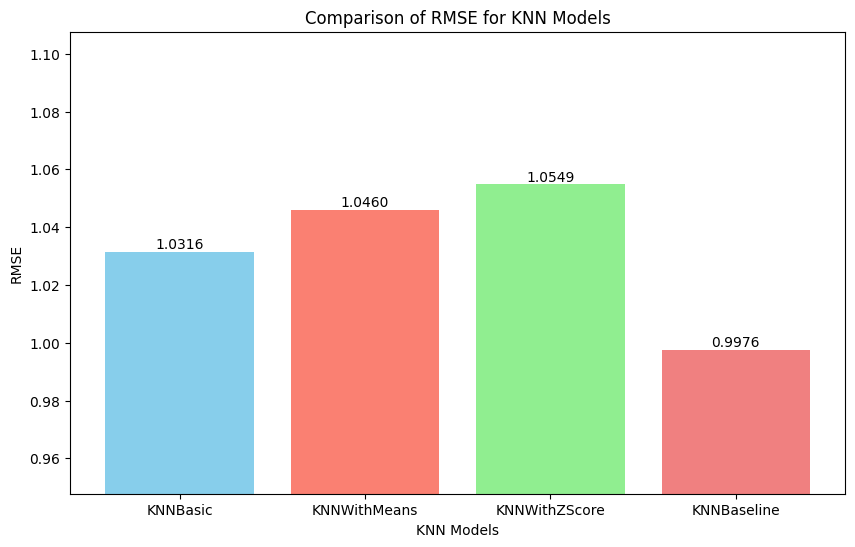

In [ ]:
# Plot เทียบ RMSE ทั้ง 4 โมเดลของ KNN

import matplotlib.pyplot as plt

rmse_values = [results[model]['RMSE'] for model in models]
model_names = list(models.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.xlabel("KNN Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for KNN Models")
plt.ylim(min(rmse_values) * 0.95, max(rmse_values) * 1.05)  # Adjust y-axis limits for better visualization

for i, v in enumerate(rmse_values):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom')

plt.show()

In [ ]:
trainset = algo.trainset
print(algo.__class__.__name__)

KNNBaseline


In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args:
      uid: the id of the user
    returns:
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0

def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [ ]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,118411464610584986015,ChIJF9CsMeWLIjERFoTuedwKw1c,-2.681446,-1.334210,"{'actual_k': 2, 'was_impossible': False}",1,26,1.347236
1,105717996299791126230,ChIJCcw_oGGKIjERrtpXGeta2NU,0.747187,0.374391,"{'actual_k': 16, 'was_impossible': False}",9,94,0.372796
2,105717996299791126230,ChIJI2V2H-SLIjERAAlDh5LoIFk,0.747187,0.554338,"{'actual_k': 12, 'was_impossible': False}",9,67,0.192849
3,105717996299791126230,ChIJSSwjXmeKIjERS8k50FvhSks,0.747187,0.171996,"{'actual_k': 40, 'was_impossible': False}",9,256,0.575190
4,104583609491746170724,ChIJV69OowqLIjERXCegoY5CJIQ,0.747187,0.233930,"{'actual_k': 2, 'was_impossible': False}",1,77,0.513256


In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
218,106685444628465539043,ChIJB6EhquyLIjER0cmSIC5dDXw,0.747187,0.747187,"{'actual_k': 2, 'was_impossible': False}",26,19,0.0
931,112015907741439717955,ChIJP21e0COKIjER7f7hhOXZ2k0,0.747187,0.747187,"{'actual_k': 3, 'was_impossible': False}",6,9,0.0
1155,101073283077473769088,ChIJv36nkiaKIjERxR-ucsTlckE,0.747187,0.747187,"{'actual_k': 2, 'was_impossible': False}",1,181,0.0
3810,106740850375819553333,ChIJO3U0axiKIjER0Rd4WUMsu6Q,0.747187,0.747187,"{'actual_k': 1, 'was_impossible': False}",1,24,0.0
727,104624813698941145381,ChIJU7_lkyqLIjERpkVf6v_m0r0,0.747187,0.747187,"{'actual_k': 2, 'was_impossible': False}",6,11,0.0
3892,114898656880761292632,ChIJ0xBeWC5nIjER1dn8vAKQEBg,0.747187,0.747187,"{'actual_k': 2, 'was_impossible': False}",3,6,0.0
3814,109418477284857133441,ChIJI4_mZgCLIjERr6IzM1Oh1wQ,0.747187,0.747187,"{'actual_k': 1, 'was_impossible': False}",3,2,0.0
2906,108541134761039321027,ChIJL2Qdb2SLIjER3RCEPmFsfsA,0.747187,0.747187,"{'actual_k': 1, 'was_impossible': False}",5,23,0.0
2303,106924734524623163667,ChIJM41BXjaLIjER-2Q1rP5YNeM,0.747187,0.747187,"{'actual_k': 3, 'was_impossible': False}",7,7,0.0
4029,118248581610957440035,ChIJG31wYsIfIjEREf39UyZFDlw,0.747187,0.747187,"{'actual_k': 1, 'was_impossible': False}",8,10,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
4930,101172049706020650319,ChIJk4D9wGuLIjERKi4-eeNoAqs,-3.824324,0.562596,"{'actual_k': 1, 'was_impossible': False}",1,61,4.386920
560,107959928932381786191,ChIJS3WiUYWJIjERHfPwsR5AK1Y,-3.824324,0.613298,"{'actual_k': 4, 'was_impossible': False}",6,74,4.437622
81,109946029923160970924,ChIJH-g7JjmLIjERuq5cltDyN5I,-3.824324,0.623054,"{'actual_k': 2, 'was_impossible': False}",1,38,4.447378
739,106647340401469015527,ChIJ_4pDFH9hIjERUoI6AWKQQC8,-3.824324,0.651510,"{'actual_k': 2, 'was_impossible': False}",1,22,4.475834
2326,110287595597525642711,ChIJr-z5tlwYIjER3ke-Xnl4LtY,-3.824324,0.664569,"{'actual_k': 1, 'was_impossible': False}",20,19,4.488893
213,106685444628465539043,ChIJ_4hLU2-KIjERz06cKI8AnK0,-3.824324,0.708337,"{'actual_k': 40, 'was_impossible': False}",26,326,4.532661
2585,115488482795248489159,ChIJF9CsMeWLIjERFoTuedwKw1c,-3.824324,0.708600,"{'actual_k': 3, 'was_impossible': False}",2,26,4.532925
3009,108184448492815880684,ChIJ3zIse0aLIjERftzB11r3Cgk,0.747187,-3.801363,"{'actual_k': 1, 'was_impossible': False}",1,336,4.548550
3385,105258602561329331836,ChIJJcvbciOKIjERSuSyTqwsnXk,-3.824324,0.727279,"{'actual_k': 1, 'was_impossible': False}",1,148,4.551603
1795,110660848931372356998,ChIJSf3kkzWLIjERMvIs6W5RyIM,-3.824324,0.747187,"{'actual_k': 4, 'was_impossible': False}",1,18,4.571511


# KNN ทั้ง 4 แบบ (ไม่ทำ Normalized)

In [ ]:
!pip3 install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357298 sha256=8fc3e9e1d78f4be5fa8f4ae61d9ff55d294274d0f75ecdd210cc779bf4aae2ad
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# prompt: perform train test split and and then use StandardScaler on trainset on rating data and then fit the model (KNNBasic, KNNWithMeans, KNNWithMeans, KNNBaseline) and then evaluate the model using RMSE

# ฟังก์ชันสำหรับประเมินผลโมเดล
def evaluate_model(predictions):
    y_true = [pred.r_ui for pred in predictions]
    y_pred = [pred.est for pred in predictions]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # root mean square error
    mae = mean_absolute_error(y_true, y_pred) # mean absolute error
    r2 = r2_score(y_true, y_pred) #  (R-squared) โมเดลของเราสามารถอธิบายความแปรปรวนของข้อมูลได้ดีแค่ไหน

    return rmse, mae, r2

df_restaurants_explode = df_restaurants_explode.groupby('reviewerId').filter(lambda x: len(x) >= 2).reset_index(drop=True)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_restaurants_explode[['reviewerId', 'placeId', 'reviewerRated']], reader)
train, test = train_test_split(data, test_size=0.3, random_state=42)

# กำหนดโมเดล
models = {
    "KNNBasic": KNNBasic(sim_options={"name": "cosine", "user_based": True}),
    "KNNWithMeans": KNNWithMeans(sim_options={"name": "cosine", "user_based": True}),
    "KNNWithZScore": KNNWithZScore(sim_options={"name": "cosine", "user_based": True}),
    "KNNBaseline": KNNBaseline(sim_options={"name": "cosine", "user_based": True})
}

results = {}
# ประเมินผลแต่ละโมเดล
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    algo = model
    algo.fit(train)
    predictions = algo.test(test)
    rmse, mae, r2 = evaluate_model(predictions)
    results[model_name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
print("================================================")
# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")



Evaluating KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithMeans...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithZScore...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNBaseline...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNNBasic: RMSE=0.9280, MAE=0.7210, R2=-0.1174
KNNWithMeans: RMSE=0.9056, MAE=0.5933, R2=-0.0641
KNNWithZScore: RMSE=0.9096, MAE=0.6011, R2=-0.0735
KNNBaseline: RMSE=0.8811, MAE=0.6751, R2=-0.0074


In [ ]:
df_restaurants_explode.shape

(17400, 118)

In [ ]:
print("Number of users:", train.n_users)
print("Number of items:", train.n_items)
print("Number of ratings:", train.n_ratings)

Number of users: 4588
Number of items: 643
Number of ratings: 12180


In [ ]:
len(test)

5220

In [ ]:
train_df = pd.DataFrame(train.all_ratings(), columns=['reviewerId', 'placeId', 'reviewerRated'])
train_df

,reviewerId,placeId,reviewerRated
0,0,0,2.0
1,0,112,4.0
2,1,1,5.0
3,1,55,5.0
4,1,39,5.0
...,...,...,...
12175,4583,68,4.0
12176,4584,50,5.0
12177,4585,2,5.0
12178,4586,500,5.0


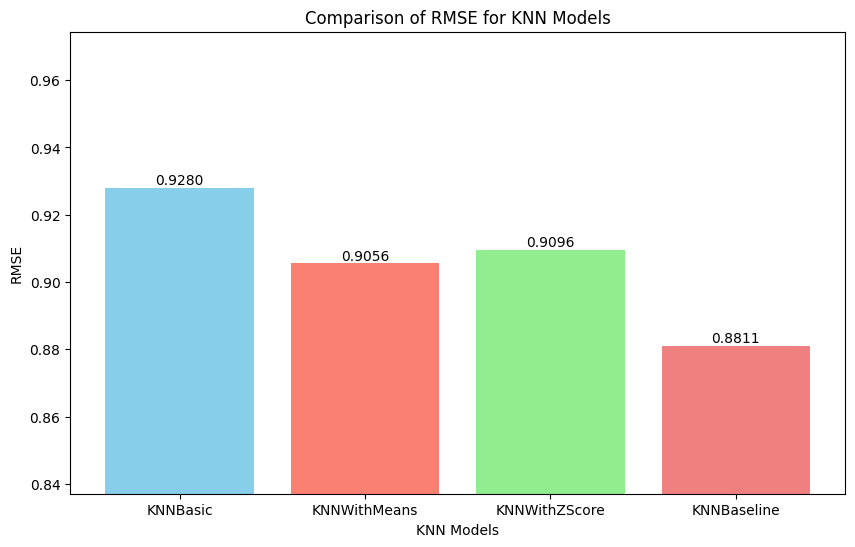

In [ ]:
# Plot เทียบ RMSE ทั้ง 4 โมเดลของ KNN

import matplotlib.pyplot as plt

rmse_values = [results[model]['RMSE'] for model in models]
model_names = list(models.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.xlabel("KNN Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for KNN Models")
plt.ylim(min(rmse_values) * 0.95, max(rmse_values) * 1.05)  # Adjust y-axis limits for better visualization

for i, v in enumerate(rmse_values):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom')

plt.show()

In [ ]:
# GridsearchCV กับ KNNBaseline
param_grid = {
    "bsl_options": {
        "method": ["als", "sgd"],
        "n_epochs": [10, 20, 30],
        "reg_u": [1, 2],
        "reg_i": [1, 2]},
    "k": [10, 20, 30],
    "min_k": [1, 2, 3],
    "sim_options": {
        "name": ["cosine", "pearson"],
        "user_based": [True, False],
    },
}
gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
print(gs.best_params['rmse'])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimat

In [ ]:
gs.best_params['rmse']

{'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 2, 'reg_i': 2},
 'k': 20,
 'min_k': 3,
 'sim_options': {'name': 'pearson', 'user_based': True}}

In [ ]:
# สร้างโมเดลใหม่ด้วยพารามิเตอร์ที่ดีที่สุด
algo = gs.best_estimator['rmse']
algo.fit(train)
predictions = algo.test(test)
rmse, mae, r2 = evaluate_model(predictions)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8097, MAE: 0.5964, R2: 0.1492


In [ ]:
# Model ที่ใช้ Predict
print(algo)

In [ ]:
df_predictions = pd.DataFrame(predictions, columns=['reviewerId', 'placeId', 'reviewerRated', 'prediction', 'details'])
df_predictions.head()

,reviewerId,placeId,reviewerRated,prediction,details
0,110286081738523318533,ChIJneC6nxiKIjERRHk5s4WPiKs,5.0,4.315151,{'was_impossible': False}
1,112983252894123730984,ChIJW76MgCiKIjERw8HXOT86TBI,5.0,4.694055,"{'actual_k': 0, 'was_impossible': False}"
2,108476263057155140840,ChIJYaBLlHtpIjERJx-vB46eJ_I,5.0,4.311312,"{'actual_k': 0, 'was_impossible': False}"
3,116974894973420469039,ChIJ_4hLU2-KIjERz06cKI8AnK0,4.0,4.159038,"{'actual_k': 0, 'was_impossible': False}"
4,113040806815502974715,ChIJEYzrcTiLIjERcEkG7v0iaKo,1.0,4.698079,"{'actual_k': 0, 'was_impossible': False}"


In [ ]:
df_predictions['error'] = abs(df_predictions['prediction'] - df_predictions['reviewerRated'])
best_predictions = df_predictions.sort_values(by='error')[:10]
worst_predictions = df_predictions.sort_values(by='error')[-10:]

In [ ]:
best_predictions

,reviewerId,placeId,reviewerRated,prediction,details,error
1690,104384565841431521740,ChIJ15gmyC-LIjERP8vfWUMm17k,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4352,103229953261152327247,ChIJI2V2H-SLIjERAAlDh5LoIFk,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
609,103367260073347478469,ChIJ-Y5ha2-KIjERFqMzCBFR81Y,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4713,102837360489653164888,ChIJrcZ3MUT1IjERsLDYtib-1MA,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
593,114073633017248834136,ChIJRS4HMl6KIjERZKHWC_sPJ3s,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4711,106523296776456987245,ChIJgS_ShDqKIjERDk-PNJ8o1mQ,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4380,105502690684418301035,ChIJA6-JTLWLIjEREmHioPMZiSc,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4382,117974855077597007817,ChIJiVVAPO-LIjERyvBxWVG8mpA,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
2151,117542065889239687760,ChIJA6-JTLWLIjEREmHioPMZiSc,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
3384,104266688212530875040,ChIJOfdQNaQfIjER2lF-P8wRzCk,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0


In [ ]:
worst_predictions

,reviewerId,placeId,reviewerRated,prediction,details,error
1903,100575547954736847636,ChIJG1rh4hAfIjERXDXPxkhIsWo,1.0,4.624499,"{'actual_k': 0, 'was_impossible': False}",3.624499
1381,105757341610990626641,ChIJt-BQUx-KIjERbspyCSsKkow,1.0,4.668760,"{'actual_k': 0, 'was_impossible': False}",3.668760
2836,115373223869931333310,ChIJNT4py7mLIjERjNyQfM6pkdQ,1.0,4.692831,"{'actual_k': 0, 'was_impossible': False}",3.692831
4,113040806815502974715,ChIJEYzrcTiLIjERcEkG7v0iaKo,1.0,4.698079,"{'actual_k': 0, 'was_impossible': False}",3.698079
89,108298060443655789328,ChIJSeMG1hmKIjERj2wYoglUxCw,1.0,4.698234,"{'actual_k': 0, 'was_impossible': False}",3.698234
2817,103685960676066521099,ChIJu3u5wROLIjERsE2SgtvyE4g,1.0,4.781489,"{'actual_k': 0, 'was_impossible': False}",3.781489
926,112635391851830326045,ChIJVRFJNC-KIjERC8B0_PRv7nM,1.0,4.810865,"{'actual_k': 0, 'was_impossible': False}",3.810865
399,109787173905973507118,ChIJ5fTsJQKLIjER7MYl_ljG87g,1.0,4.812981,"{'actual_k': 0, 'was_impossible': False}",3.812981
4783,112965773837489353667,ChIJTRfTbEKJIjERdmJksYlZbIM,1.0,4.816641,"{'actual_k': 1, 'was_impossible': False}",3.816641
770,101135338517333595967,ChIJRS4HMl6KIjERZKHWC_sPJ3s,1.0,4.900919,"{'actual_k': 0, 'was_impossible': False}",3.900919


# SVD By Surprise

**ตัวแปรที่ใช้ในการทดลอง**
*   n_factors: จำนวนของ latent factors ที่ใช้สำหรับการแสดงผู้ใช้และสินค้า
*   n_epochs: จำนวนรอบการเรียนรู้ในการปรับพารามิเตอร์
*   lr_all: ค่า learning rate สำหรับพารามิเตอร์ทั้งหมด
*   reg_all: ค่าการ regularization สำหรับพารามิเตอร์ทั้งหมด
*   bu: bias ของผู้ใช้ (ใช้เมื่อ biased = True)
*   bi: bias ของสินค้า (ใช้เมื่อ biased = True)
*   pu และ qi: latent vectors ของผู้ใช้และสินค้า



In [ ]:
# ฟังก์ชันสำหรับประเมินผลโมเดล
def evaluate_model(predictions):
    y_true = [pred.r_ui for pred in predictions]
    y_pred = [pred.est for pred in predictions]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # root mean square error
    mae = mean_absolute_error(y_true, y_pred) # mean absolute error
    r2 = r2_score(y_true, y_pred) #  (R-squared) โมเดลของเราสามารถอธิบายความแปรปรวนของข้อมูลได้ดีแค่ไหน

    return rmse, mae, r2

#df_restaurants_explode = df_restaurants_explode.groupby('reviewerId').filter(lambda x: len(x) >= 2).reset_index(drop=True)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_restaurants_explode[['reviewerId', 'placeId', 'reviewerRated']], reader)
train, test = train_test_split(data, test_size=0.3, random_state=42)

# กำหนดโมเดล
models = {
    "SVD": SVD(),
    "SVDpp": SVDpp(),
    "NMF": NMF(),
}

results = {}
# ประเมินผลแต่ละโมเดล
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    algo = model
    algo.fit(train)
    predictions = algo.test(test)
    rmse, mae, r2 = evaluate_model(predictions)
    results[model_name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
print("================================================")
# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")



Evaluating SVD...
Evaluating SVDpp...
Evaluating NMF...
SVD: RMSE=0.9199, MAE=0.6954, R2=0.0611
SVDpp: RMSE=0.9169, MAE=0.6898, R2=0.0672
NMF: RMSE=1.0169, MAE=0.7912, R2=-0.1475


In [ ]:
# GridsearchCV กับ SVD
param_grid = {"n_epochs": [20, 30, 40],
              "lr_all": [0.002, 0.005],
              "reg_all": [0.02, 0.04, 0.06],
              "n_factors": [50, 100, 150],
              "biased": [True, False],
              "verbose": [True]
              }
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
print(gs.best_params['rmse'])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing ep

In [ ]:
# สร้างโมเดลใหม่ด้วยพารามิเตอร์ที่ดีที่สุด
algo = gs.best_estimator['rmse']
algo.fit(train)
predictions = algo.test(test)
rmse, mae, r2 = evaluate_model(predictions)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
RMSE: 0.9113, MAE: 0.6826, R2: 0.0785
